## Dataset Information

This dataset is taken from the UCI ML repository, link here: https://archive.ics.uci.edu/dataset/320/student+performance

The dataset contains two files, both of which contain the same or similar data. One of the files is for a mathematics class and the other one is for a Portuegese class. I will be focusing on the mathematics class data, so the other files have been removed.

## Changelog
### 21/03/2024
- Add dataset.
- Remove Portuegese data from dataset.
- The dataset columns are separated by semicolons (;), which is something I am not used to, I needed to use `sep=;` flag when reading the data into a DataFrame. 
- Get general dataset information.
- Perform label encoding on categorical data
- Create simple neural network
- Added StandardScaler and better model evaluation.

In [33]:
import pandas as pd

data_path = 'data/student-mat.csv'
df = pd.read_csv(data_path, sep=';')

Getting general dataset info such as:
- Num features.
- Num instances.
- How much of each data type (numerical, categorical, etc.) there is.

In [34]:
n_features = len(df.columns)
n_instances = len(df)

n_categorical = df.select_dtypes(include=['object']).shape[1]
n_numeric = df.select_dtypes(include=['number']).shape[1]

print(f"Number of features: {n_features}")
print(f"Number of instances: {n_instances}")
print(f"Number of categorical features: {n_categorical}")
print(f"Number of numeric features: {n_numeric}")

Number of features: 33
Number of instances: 395
Number of categorical features: 17
Number of numeric features: 16


Ideally I want to label encode the categorical data for the neural network. First step is to get the number of unique categorical datapoint from each column.

In [35]:
from sklearn import preprocessing

# get unique values for each categorical feature
for col in df.select_dtypes(include=['object']).columns:
    unique_values = df[col].unique()
    print(f"Unique values for {col}: {unique_values}")
print()

# create new labelled df
labelled_df = df.copy()
le = preprocessing.LabelEncoder()
for col in labelled_df.select_dtypes(include=['object']).columns:
    labelled_df[col] = le.fit_transform(labelled_df[col])
    print(f"Label encoded {col}: {labelled_df[col].unique()}")

Unique values for school: ['GP' 'MS']
Unique values for sex: ['F' 'M']
Unique values for address: ['U' 'R']
Unique values for famsize: ['GT3' 'LE3']
Unique values for Pstatus: ['A' 'T']
Unique values for Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Unique values for Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
Unique values for reason: ['course' 'other' 'home' 'reputation']
Unique values for guardian: ['mother' 'father' 'other']
Unique values for schoolsup: ['yes' 'no']
Unique values for famsup: ['no' 'yes']
Unique values for paid: ['no' 'yes']
Unique values for activities: ['no' 'yes']
Unique values for nursery: ['yes' 'no']
Unique values for higher: ['yes' 'no']
Unique values for internet: ['no' 'yes']
Unique values for romantic: ['no' 'yes']

Label encoded school: [0 1]
Label encoded sex: [0 1]
Label encoded address: [1 0]
Label encoded famsize: [0 1]
Label encoded Pstatus: [0 1]
Label encoded Mjob: [0 1 2 3 4]
Label encoded Fjob: [4 2 3 1 0]
Label encoded reas

Creating a simple neural network to see what the output looks like and if any changes need to be made.

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

X = labelled_df.drop(['G1', 'G2', 'G3'], axis=1)
y = labelled_df[['G1', 'G2', 'G3']]

def train_model(X: pd.DataFrame, y: pd.DataFrame):
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # build a simple neural network
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # output layer for G1, G2, G3
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # train the model
    model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

    return model, X_test, y_test

model, X_test, y_test = train_model(X, y)

# evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

# make predictions
predictions = model.predict(X_test)
print(f"Predictions: {predictions[:5]}")  # print first 5 predictions

Epoch 1/200


/home/jack/College/DataSciML/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 187.0453 - mae: 12.9676 - val_loss: 88.0034 - val_mae: 8.8546
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.5595 - mae: 7.4656 - val_loss: 29.2531 - val_mae: 4.6258
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.5611 - mae: 4.2845 - val_loss: 13.4732 - val_mae: 2.7407
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.9332 - mae: 3.1339 - val_loss: 16.3706 - val_mae: 3.1606
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.6310 - mae: 3.2837 - val_loss: 13.9132 - val_mae: 2.8410
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.2014 - mae: 3.1784 - val_loss: 13.3090 - val_mae: 2.7213
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.0751 - mae: 3.3966 - val_loss: 13.4782 - val_mae: 2.7416
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.3488 - mae: 3.0633 - val_loss: 13.0495 - val_mae: 2.7025
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.8468 - mae: 3

Obviously some improvements can be made, I will do the following:
- One-hot encoding vs labelled encoding to eliminate implied ordinality.
- I will scale the data using StandardScaler
- Better model evaluation and visualisation.

In [37]:
from sklearn.preprocessing import StandardScaler

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
labelled_df = pd.get_dummies(df, columns=categorical_features)

X = labelled_df.drop(['G1', 'G2', 'G3'], axis=1)
y = labelled_df[['G1']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model, X_test, y_test = train_model(X_scaled, y)
y_pred = model.predict(X_test)

Epoch 1/200


/home/jack/College/DataSciML/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 132.7280 - mae: 10.9872 - val_loss: 109.1646 - val_mae: 9.9947
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 99.5124 - mae: 9.4130 - val_loss: 87.6158 - val_mae: 8.8389
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 85.1954 - mae: 8.5782 - val_loss: 66.6131 - val_mae: 7.5358
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 57.0774 - mae: 6.7745 - val_loss: 46.6369 - val_mae: 6.0333
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.9395 - mae: 5.5752 - val_loss: 29.1380 - val_mae: 4.4905
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.8424 - mae: 4.2451 - val_loss: 16.5493 - val_mae: 3.2184
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.5386 - mae: 3.2025 - val_loss: 10.6997 - val_mae: 2.5899
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.5271 - mae: 2.7215 - val_loss: 9.6530 - val_mae: 2.4798
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4107 - mae: 2.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Squared Error: 14.587454326266931
Mean Absolute Error: 2.9366320175460623
R-squared: -0.06689512729644775


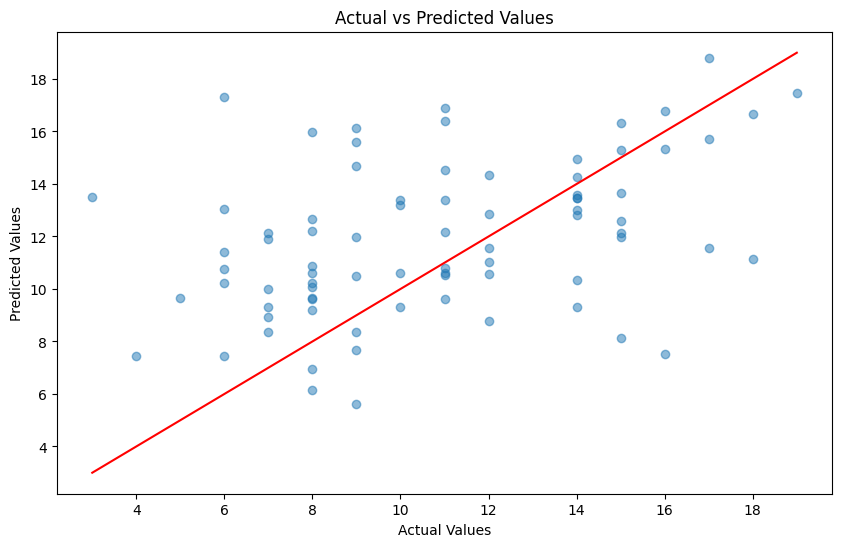

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Since confusion matrix is for classification, we can't directly use it.
# If you want to analyze the prediction errors, you can plot the predicted vs actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test.values.flatten(), y_pred.flatten(), alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot(np.linspace(y_test.min(), y_test.max(), 100), np.linspace(y_test.min(), y_test.max(), 100), color='red')
plt.savefig('actual_vs_predicted.png')
plt.show()